In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.linear_model import LogisticRegressionCV,SGDClassifier,LogisticRegression

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix


In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.drop('Loan_ID',axis = 1,inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.6+ KB


In [6]:
obj_cols = [*df.select_dtypes('object').columns]
obj_cols.remove('Loan_Status')

obj_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

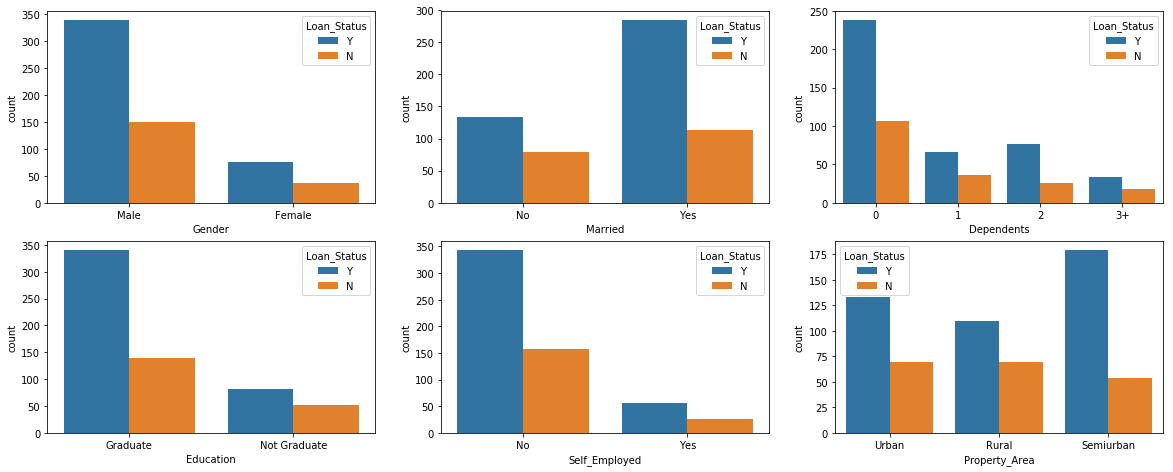

In [7]:
plt.figure(figsize=(20,12))

for idx,cols in enumerate(obj_cols):
    plt.subplot(3,3,idx+1)
    sns.countplot(cols,data = df,hue = 'Loan_Status')

In [8]:
num_cols = [*df.select_dtypes(['int64','float64']).columns]

In [9]:
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [10]:
num_cols.remove('Loan_Amount_Term')

In [11]:
num_cols.remove('Credit_History')

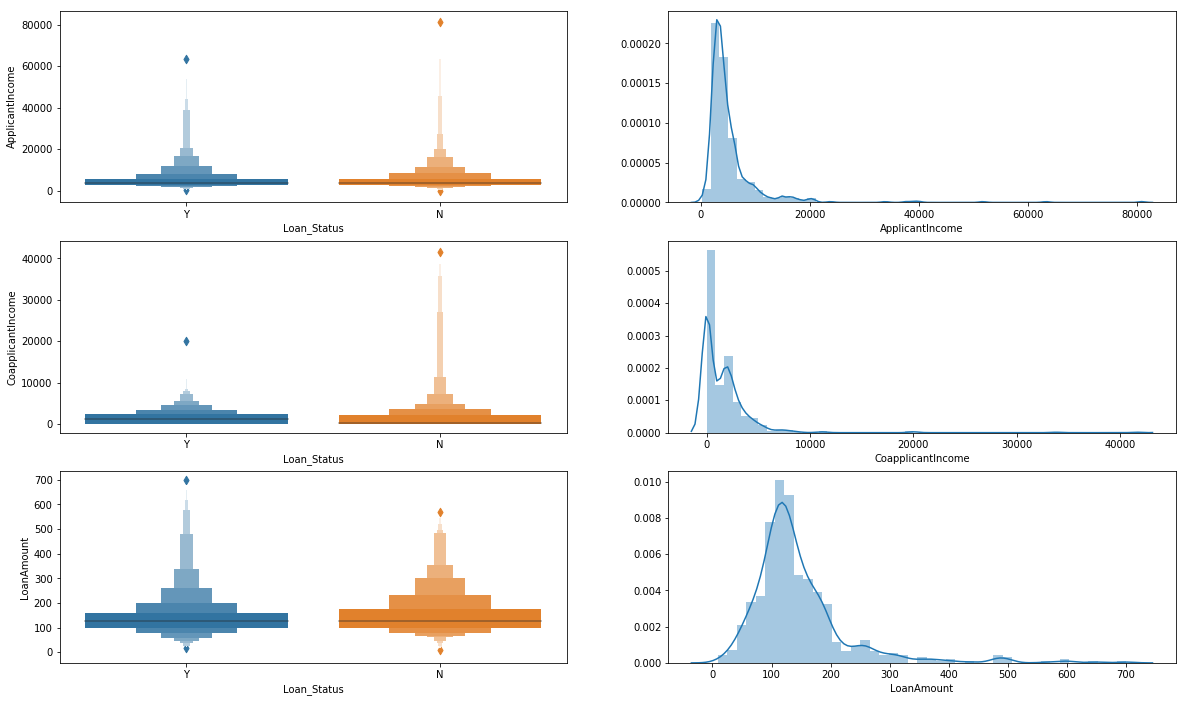

In [12]:
plt.figure(figsize=(20,12))
count = 1
for cols in num_cols:
    plt.subplot(3,2,count)
    sns.boxenplot(x='Loan_Status',y = cols, data = df)
    count +=1
    plt.subplot(3,2,count)
    sns.distplot(df.loc[df[cols].notna(), cols])
    count +=1

In [13]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.6+ KB


In [15]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
df.Loan_Status.replace({'Y':1,'N':0},inplace = True)

In [17]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0


In [18]:
df['Loan_Status'] = df.Loan_Status.astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int32
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 55.2+ KB


In [20]:
dummies = pd.get_dummies(df,drop_first=True)

In [56]:
#dummies

In [22]:
SimImp = SimpleImputer()

In [23]:
train = pd.DataFrame(SimImp.fit_transform(dummies),columns = dummies.columns)

In [24]:
train.sample(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
498,2895.0,0.0,95.000000,360.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
380,3333.0,2500.0,128.000000,360.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
114,5050.0,0.0,118.000000,360.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
475,16525.0,1014.0,150.000000,360.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
608,3232.0,1950.0,108.000000,360.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
407,2213.0,0.0,66.000000,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
467,16692.0,0.0,110.000000,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
63,4945.0,0.0,146.412162,360.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
135,4000.0,7750.0,290.000000,360.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
426,4606.0,0.0,81.000000,360.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
ApplicantIncome            614 non-null float64
CoapplicantIncome          614 non-null float64
LoanAmount                 614 non-null float64
Loan_Amount_Term           614 non-null float64
Credit_History             614 non-null float64
Loan_Status                614 non-null float64
Gender_Male                614 non-null float64
Married_Yes                614 non-null float64
Dependents_1               614 non-null float64
Dependents_2               614 non-null float64
Dependents_3+              614 non-null float64
Education_Not Graduate     614 non-null float64
Self_Employed_Yes          614 non-null float64
Property_Area_Semiurban    614 non-null float64
Property_Area_Urban        614 non-null float64
dtypes: float64(15)
memory usage: 72.0 KB


In [26]:
train['Loan_Term_360'] = np.where(train.Loan_Amount_Term == 360,1,0)

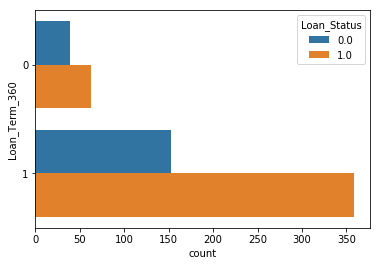

In [29]:
sns.countplot(y='Loan_Term_360',data = train,hue = 'Loan_Status')

In [31]:
train.drop('Loan_Amount_Term',axis = 1,inplace = True)

In [34]:
train['NoCoApplicantIncome'] = np.where(train.CoapplicantIncome == 0,1,0)

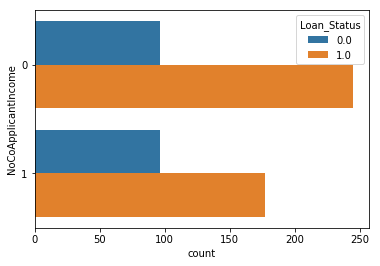

In [36]:
sns.countplot(y ='NoCoApplicantIncome',data=train,hue='Loan_Status' )

In [37]:
obj_train = train.drop(num_cols,axis=1)

In [39]:
obj_train.head()


,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Term_360,NoCoApplicantIncome
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1


In [40]:
X,y = obj_train.drop('Loan_Status',axis=1),obj_train.Loan_Status

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 123,stratify=y)

In [45]:
logit = LogisticRegressionCV()

In [46]:
logit.fit(X_train,y_train)

C:\Users\dinesh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [48]:
logit_pred = logit.predict(X_test)

In [49]:
print(accuracy_score(y_test,logit_pred))

0.7886178861788617


In [50]:
confusion_matrix(y_test,logit_pred)

array([[12, 26],
       [ 0, 85]], dtype=int64)

In [51]:
sgd_clf = SGDClassifier() 

In [52]:
sgd_clf.fit(X_train,y_train)

C:\Users\dinesh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [53]:
sgd_clf_pred = sgd_clf.predict(X_test)

In [54]:
print(accuracy_score(y_test,sgd_clf_pred))

0.7886178861788617


In [55]:
confusion_matrix(y_test,sgd_clf_pred)

array([[14, 24],
       [ 2, 83]], dtype=int64)